In [1]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [3]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [13]:
%run ../test/test_algorithms.py

......................
----------------------------------------------------------------------
Ran 22 tests in 0.239s

OK


In [14]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.032s

OK


In [15]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


In [16]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [17]:
%run ../test/test_activate.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## First whole system test - I am alive

In [28]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [19]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [20]:
training = training.get_close()

In [21]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [22]:
predict = predict.get_close()

In [23]:
predict_req, real = data_prep(predict, 24, 30)

Epoch 1/10
23/23 [==============================] - 0s 20ms/step - loss: 32.1891 - mean_squared_error: 32.1891 - val_loss: 49.3774 - val_mean_squared_error: 49.3774
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 21.5445 - mean_squared_error: 21.5445 - val_loss: 26.3249 - val_mean_squared_error: 26.3249
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 10.3480 - mean_squared_error: 10.3480 - val_loss: 9.9493 - val_mean_squared_error: 9.9493
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 3.0997 - mean_squared_error: 3.0997 - val_loss: 2.1746 - val_mean_squared_error: 2.1746
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5232 - mean_squared_error: 0.5232 - val_loss: 0.5089 - val_mean_squared_error: 0.5089
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1316 - mean_squared_error: 0.1316 - val_loss: 0.4023 - val_mean_squared_error: 0.4023
Epoch 7/10
23/23 [===========

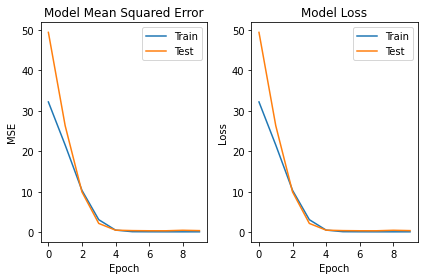

Epoch 1/10
23/23 [==============================] - 1s 42ms/step - loss: 26.2577 - mean_squared_error: 26.2577 - val_loss: 28.9360 - val_mean_squared_error: 28.9360
Epoch 2/10
23/23 [==============================] - 0s 18ms/step - loss: 10.4025 - mean_squared_error: 10.4025 - val_loss: 7.3135 - val_mean_squared_error: 7.3135
Epoch 3/10
23/23 [==============================] - 0s 16ms/step - loss: 1.5259 - mean_squared_error: 1.5259 - val_loss: 1.4891 - val_mean_squared_error: 1.4891
Epoch 4/10
23/23 [==============================] - 0s 17ms/step - loss: 0.2542 - mean_squared_error: 0.2542 - val_loss: 1.0737 - val_mean_squared_error: 1.0737
Epoch 5/10
23/23 [==============================] - 0s 17ms/step - loss: 0.1449 - mean_squared_error: 0.1449 - val_loss: 0.5571 - val_mean_squared_error: 0.5571
Epoch 6/10
23/23 [==============================] - 0s 17ms/step - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.5762 - val_mean_squared_error: 0.5762
Epoch 7/10
23/23 [==========

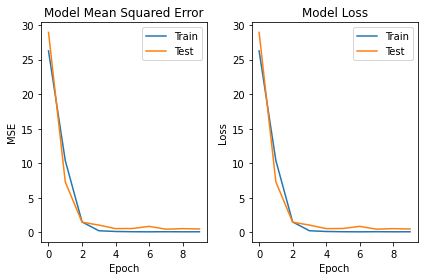

Epoch 1/10
23/23 [==============================] - 0s 7ms/step - loss: 20.1219 - mean_squared_error: 20.1219 - val_loss: 11.2913 - val_mean_squared_error: 11.2913
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 2.3408 - mean_squared_error: 2.3408 - val_loss: 1.0277 - val_mean_squared_error: 1.0277
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2219 - mean_squared_error: 0.2219 - val_loss: 0.3940 - val_mean_squared_error: 0.3940
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1271 - mean_squared_error: 0.1271 - val_loss: 0.3378 - val_mean_squared_error: 0.3378
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.3332 - val_mean_squared_error: 0.3332
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.3389 - val_mean_squared_error: 0.3389
Epoch 7/10
23/23 [==================

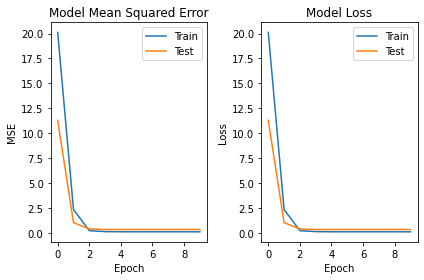

In [24]:
final_df = individual_predictors1(training, predict_req, 30)

Epoch 1/10
23/23 [==============================] - 0s 21ms/step - loss: 33.5773 - mean_squared_error: 33.5773 - val_loss: 55.9654 - val_mean_squared_error: 55.9654
Epoch 2/10
23/23 [==============================] - 0s 7ms/step - loss: 27.3791 - mean_squared_error: 27.3791 - val_loss: 39.0067 - val_mean_squared_error: 39.0067
Epoch 3/10
23/23 [==============================] - 0s 6ms/step - loss: 17.8695 - mean_squared_error: 17.8695 - val_loss: 22.2607 - val_mean_squared_error: 22.2607
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 7.5204 - mean_squared_error: 7.5204 - val_loss: 5.6490 - val_mean_squared_error: 5.6490
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 1.4290 - mean_squared_error: 1.4290 - val_loss: 0.7199 - val_mean_squared_error: 0.7199
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 0.1719 - mean_squared_error: 0.1719 - val_loss: 0.3993 - val_mean_squared_error: 0.3993
Epoch 7/10
23/23 [=========

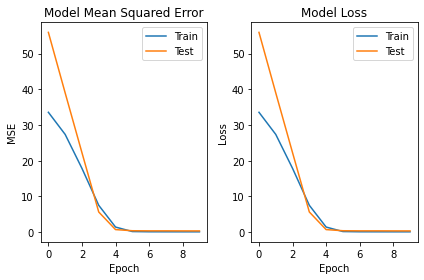

Epoch 1/10
23/23 [==============================] - 1s 46ms/step - loss: 23.0777 - mean_squared_error: 23.0777 - val_loss: 22.0926 - val_mean_squared_error: 22.0926
Epoch 2/10
23/23 [==============================] - 1s 25ms/step - loss: 5.7433 - mean_squared_error: 5.7433 - val_loss: 4.1080 - val_mean_squared_error: 4.1080
Epoch 3/10
23/23 [==============================] - 1s 24ms/step - loss: 0.8191 - mean_squared_error: 0.8191 - val_loss: 0.8629 - val_mean_squared_error: 0.8629
Epoch 4/10
23/23 [==============================] - 1s 25ms/step - loss: 0.1857 - mean_squared_error: 0.1857 - val_loss: 0.4856 - val_mean_squared_error: 0.4856
Epoch 5/10
23/23 [==============================] - 1s 23ms/step - loss: 0.1348 - mean_squared_error: 0.1348 - val_loss: 0.5789 - val_mean_squared_error: 0.5789
Epoch 6/10
23/23 [==============================] - 1s 25ms/step - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.6006 - val_mean_squared_error: 0.6006
Epoch 7/10
23/23 [============

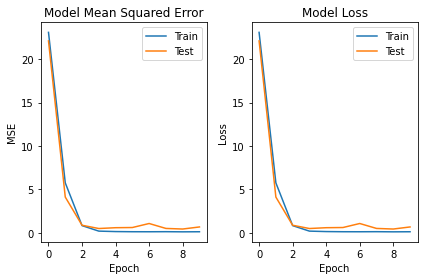

Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 20.1649 - mean_squared_error: 20.1649 - val_loss: 14.6389 - val_mean_squared_error: 14.6389
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 3.3940 - mean_squared_error: 3.3940 - val_loss: 1.3851 - val_mean_squared_error: 1.3851
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.2902 - mean_squared_error: 0.2902 - val_loss: 0.4217 - val_mean_squared_error: 0.4217
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1375 - mean_squared_error: 0.1375 - val_loss: 0.3947 - val_mean_squared_error: 0.3947
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.3768 - val_mean_squared_error: 0.3768
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.3648 - val_mean_squared_error: 0.3648
Epoch 7/10
23/23 [==================

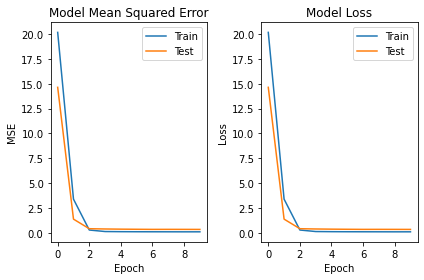

Epoch 1/10
23/23 [==============================] - 0s 9ms/step - loss: 29.6494 - mean_squared_error: 29.6494 - val_loss: 38.0696 - val_mean_squared_error: 38.0696
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 16.4022 - mean_squared_error: 16.4022 - val_loss: 20.0676 - val_mean_squared_error: 20.0676
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 7.5745 - mean_squared_error: 7.5745 - val_loss: 7.2180 - val_mean_squared_error: 7.2180
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 2.2224 - mean_squared_error: 2.2224 - val_loss: 1.6161 - val_mean_squared_error: 1.6161
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4252 - mean_squared_error: 0.4252 - val_loss: 0.4812 - val_mean_squared_error: 0.4812
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1610 - mean_squared_error: 0.1610 - val_loss: 0.3659 - val_mean_squared_error: 0.3659
Epoch 7/10
23/23 [==============

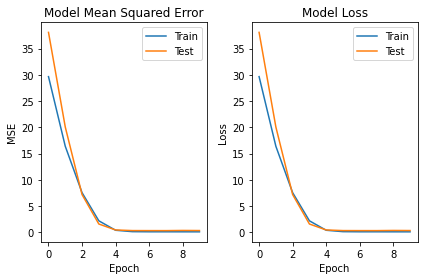

In [29]:
final_df2 = individual_predictors2(training, predict_req, 30)

In [10]:
#final_df = pd.concat([A, B, C], axis=1)

### System Disagreement

In [30]:
final_df2

,CNN-LSTM,Bidirectional LSTM,CNN,MLP
0,9.598654,9.076821,9.369738,9.541000
1,9.152613,8.343049,9.407073,9.658629
2,9.084302,6.987395,9.487443,9.692805
3,9.257394,8.814042,9.528090,9.709281
4,9.491433,5.031631,9.501368,9.691038
5,9.046203,6.980329,9.570560,9.795526
6,9.133693,7.409716,9.553055,9.748706
7,9.621214,8.266061,9.527421,9.735640
8,9.624962,4.352298,9.624689,9.858932
9,9.241419,9.811175,9.671606,9.835287


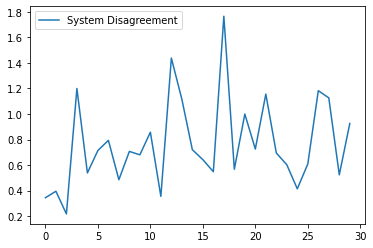

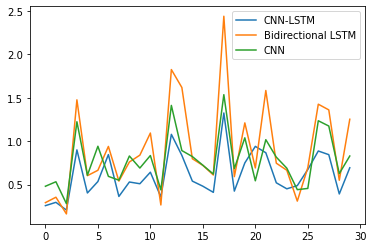

In [31]:
system_disagreement(final_df)

In [13]:
disagreement(final_df)

,System Disagreement
0,0.799198
1,0.602225
2,0.385762
3,0.079986
4,1.269367
5,1.138595
6,0.543188
7,0.432112
8,0.996481
9,0.763944


In [14]:
predictor_score(final_df)

,CNN-LSTM,Bidirectional LSTM,CNN
0,0.905641,0.892555,0.599399
1,0.589157,0.451669,0.765849
2,0.484840,0.289321,0.383124
3,0.100037,0.059989,0.079931
4,0.952025,1.581078,1.274997
5,0.853946,1.418943,1.142896
6,0.407391,0.723894,0.498279
7,0.324084,0.461804,0.510447
8,0.747361,1.393949,0.848135
9,0.572958,0.694451,1.024423


### System consensus

In [15]:
algos = consensus(final_df, real)

In [16]:
algos

,Average,NoMemory,Memory,Focus,Anchor
0,9.502471,9.502471,9.502471,9.502471,9.679673
1,8.838167,8.827354,8.832760,8.249009,8.763355
2,9.250790,9.323469,9.257169,9.633914,9.299066
3,9.456144,9.460717,9.458326,9.476250,9.422528
4,8.370902,8.335120,8.387265,8.676983,8.458230
5,8.659388,9.066245,8.739448,9.802284,8.911049
6,9.239752,9.402448,9.298591,9.465367,9.280792
7,9.219999,9.187970,9.244216,9.171355,9.207449
8,8.994742,8.809595,9.060243,9.540556,8.942409
9,8.901339,8.933256,8.902936,8.571367,9.014341


In [17]:
ui = combined_frame(final_df, algos, real)

In [18]:
ui

,Average,NoMemory,Memory,Focus,Anchor,Real Value,CNN-LSTM,Bidirectional LSTM,CNN
Date,,,,,,,,,
2010-07-06,9.502471,9.502471,9.502471,9.502471,9.679673,8.879643,8.596829,10.395025,9.515557
2010-07-07,8.838167,8.827354,8.832760,8.249009,8.763355,9.238214,8.249009,8.661475,9.604015
2010-07-08,9.250790,9.323469,9.257169,9.633914,9.299066,9.217500,8.765950,9.352506,9.633914
2010-07-09,9.456144,9.460717,9.458326,9.476250,9.422528,9.272143,9.356107,9.476250,9.536075
2010-07-12,8.370902,8.335120,8.387265,8.676983,8.458230,9.188929,8.676983,6.789824,9.645899
2010-07-13,8.659388,9.066245,8.739448,9.802284,8.911049,8.992857,8.935435,7.240445,9.802284
2010-07-14,9.239752,9.402448,9.298591,9.465367,9.280792,9.026071,9.465367,8.515858,9.738030
2010-07-15,9.219999,9.187970,9.244216,9.171355,9.207449,8.980357,9.171355,8.758195,9.730446
2010-07-16,8.994742,8.809595,9.060243,9.540556,8.942409,8.925000,9.540556,7.600793,9.842876


In [19]:
mse_score(ui)

([('Average', 0.11582692098119994),
  ('NoMemory', 0.10033822571417636),
  ('Memory', 0.11334607677163776),
  ('Focus', 0.276797744005106),
  ('Anchor', 0.11208712212251992)],
 [('CNN-LSTM', 0.1671264868872034),
  ('Bidirectional LSTM', 1.489889439553182),
  ('CNN', 0.7826356402136602)])

In [20]:
mse_log_score(ui)

([('Average', 0.001130991742068178),
  ('NoMemory', 0.000984160947181129),
  ('Memory', 0.0011028209243960922),
  ('Focus', 0.0028362500741295014),
  ('Anchor', 0.001086367547591014)],
 [('CNN-LSTM', 0.0016041444899500684),
  ('Bidirectional LSTM', 0.01679407758676077),
  ('CNN', 0.006982065118519924)])

In [21]:
mae_score(ui)

([('Average', 0.2717398696475559),
  ('NoMemory', 0.2565858175390262),
  ('Memory', 0.27236856078879884),
  ('Focus', 0.3963614516788059),
  ('Anchor', 0.2553838721225631)],
 [('CNN-LSTM', 0.319001293182373),
  ('Bidirectional LSTM', 1.0578311125437418),
  ('CNN', 0.8333850542704264)])

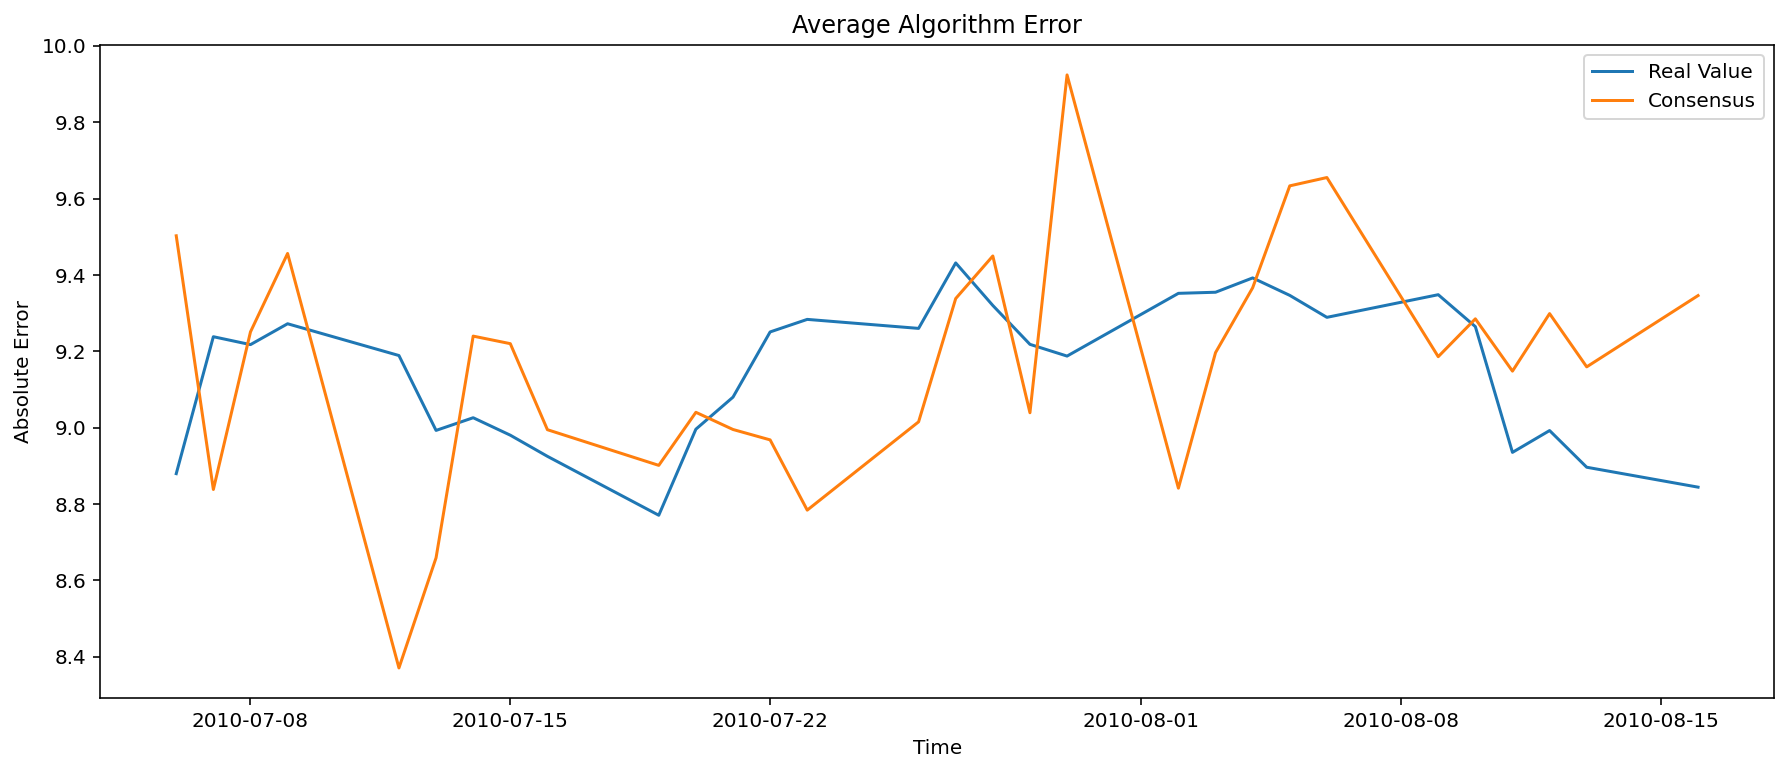

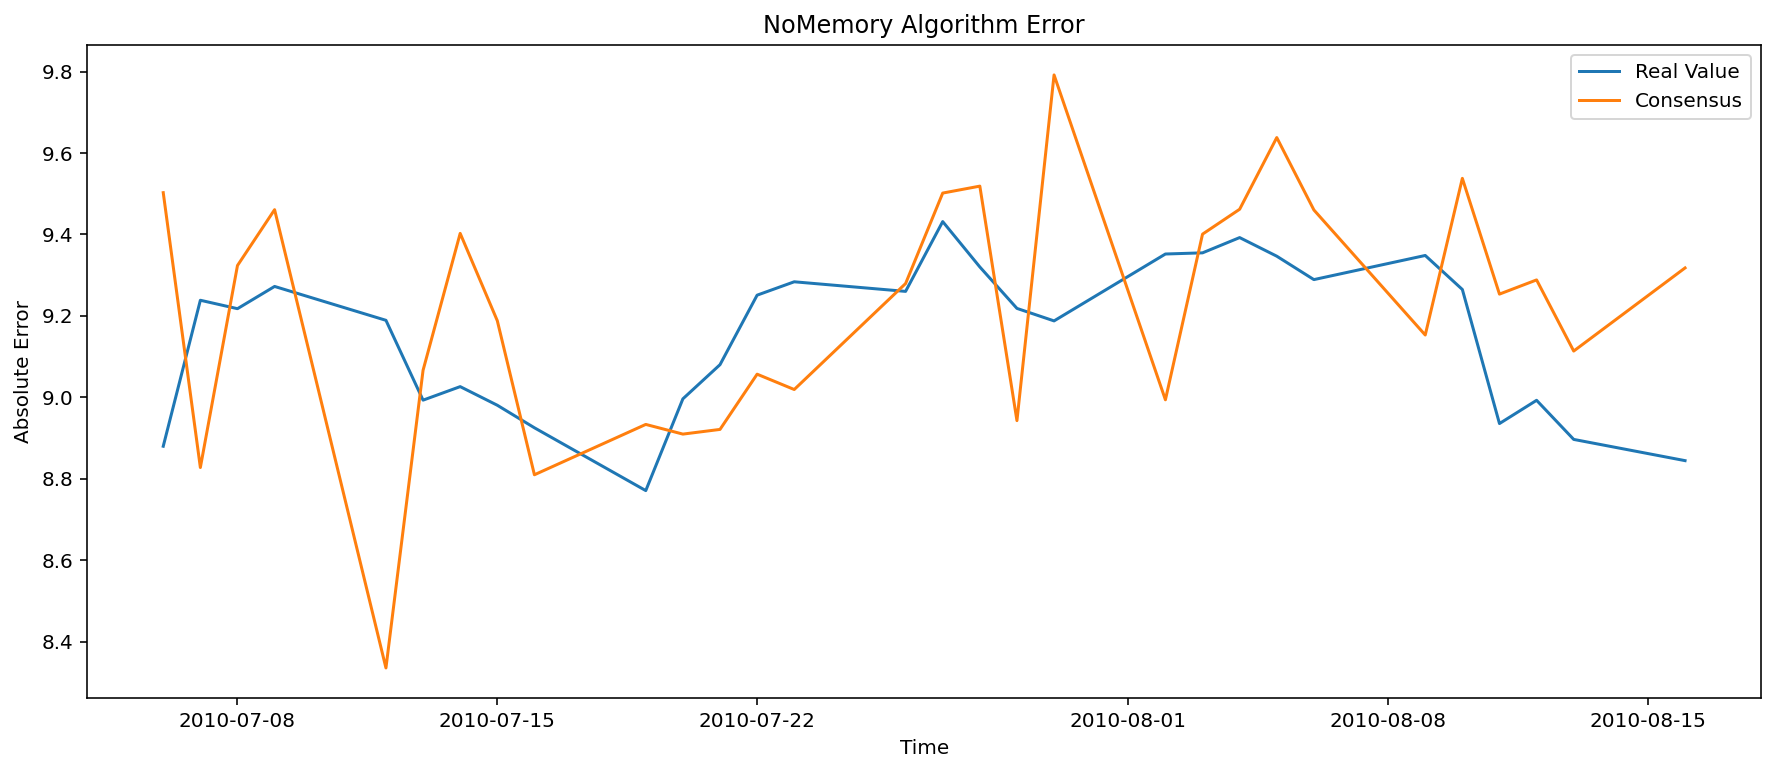

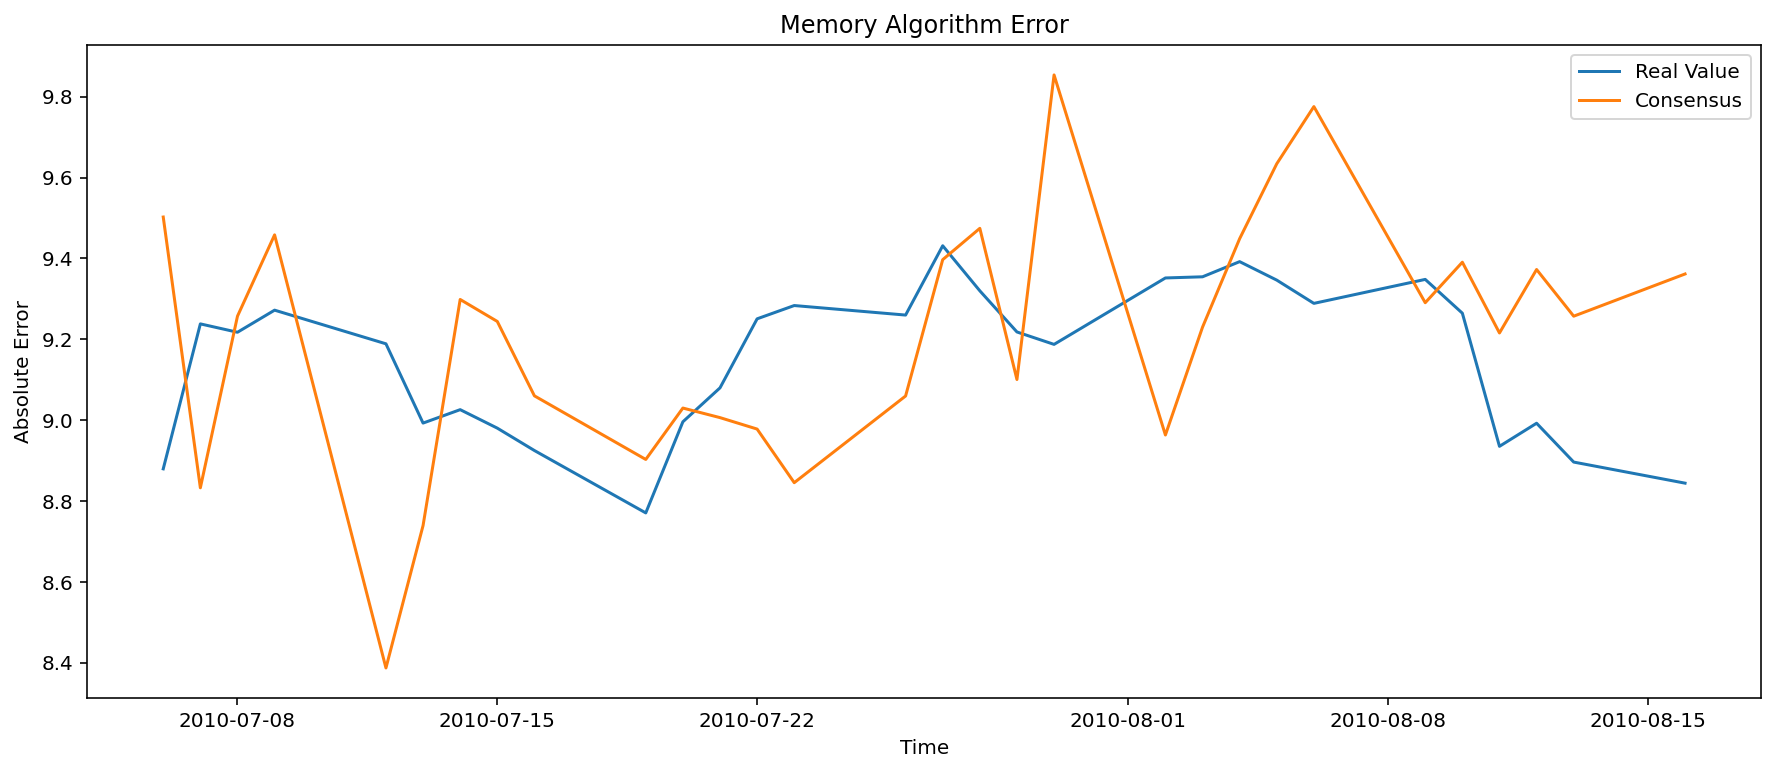

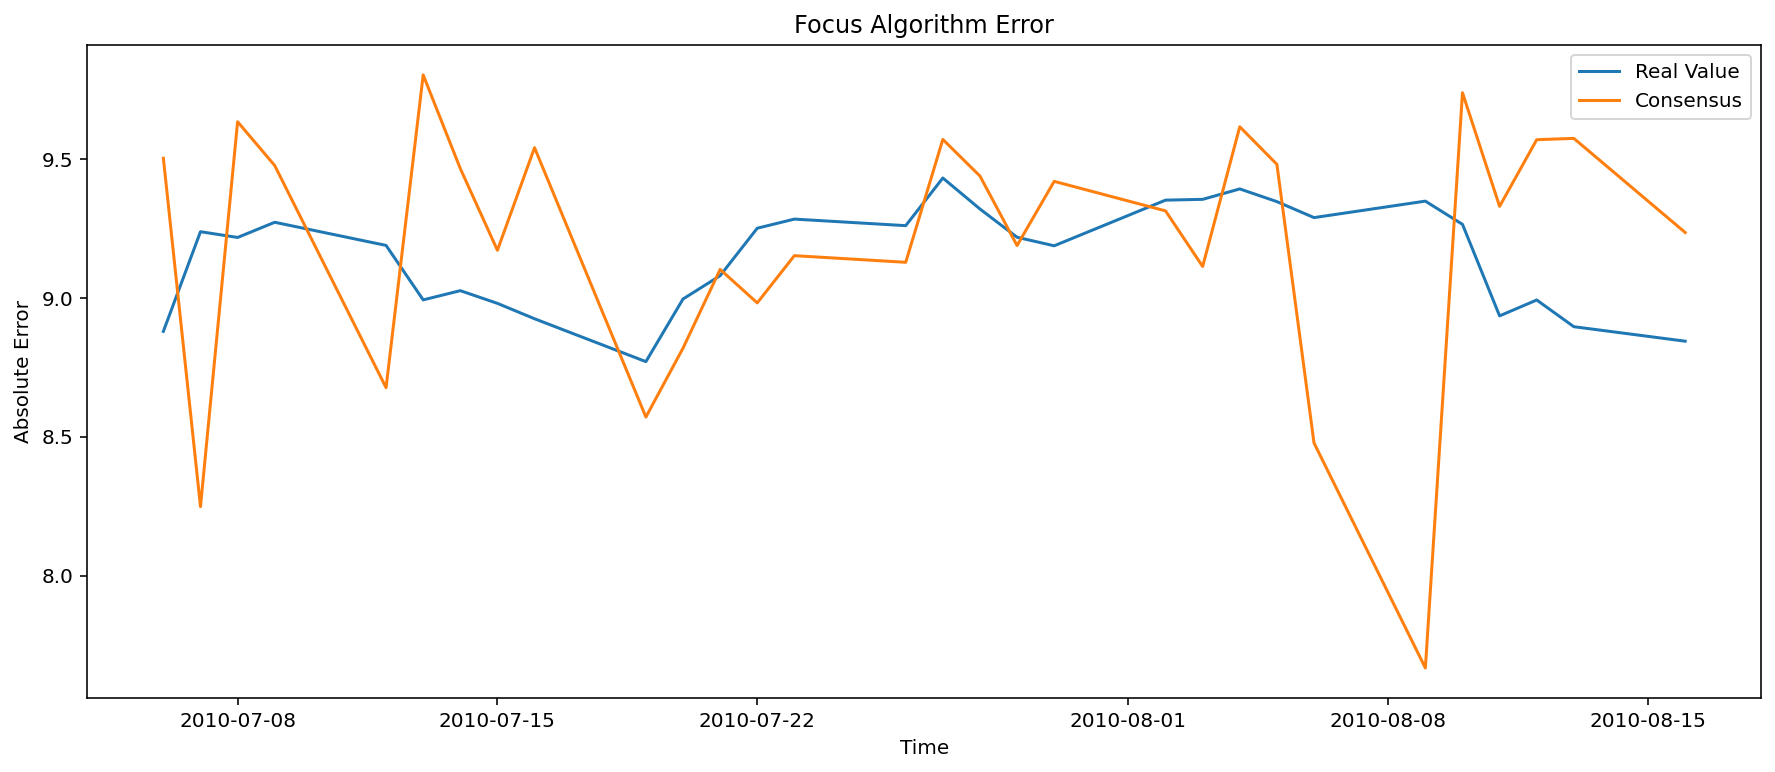

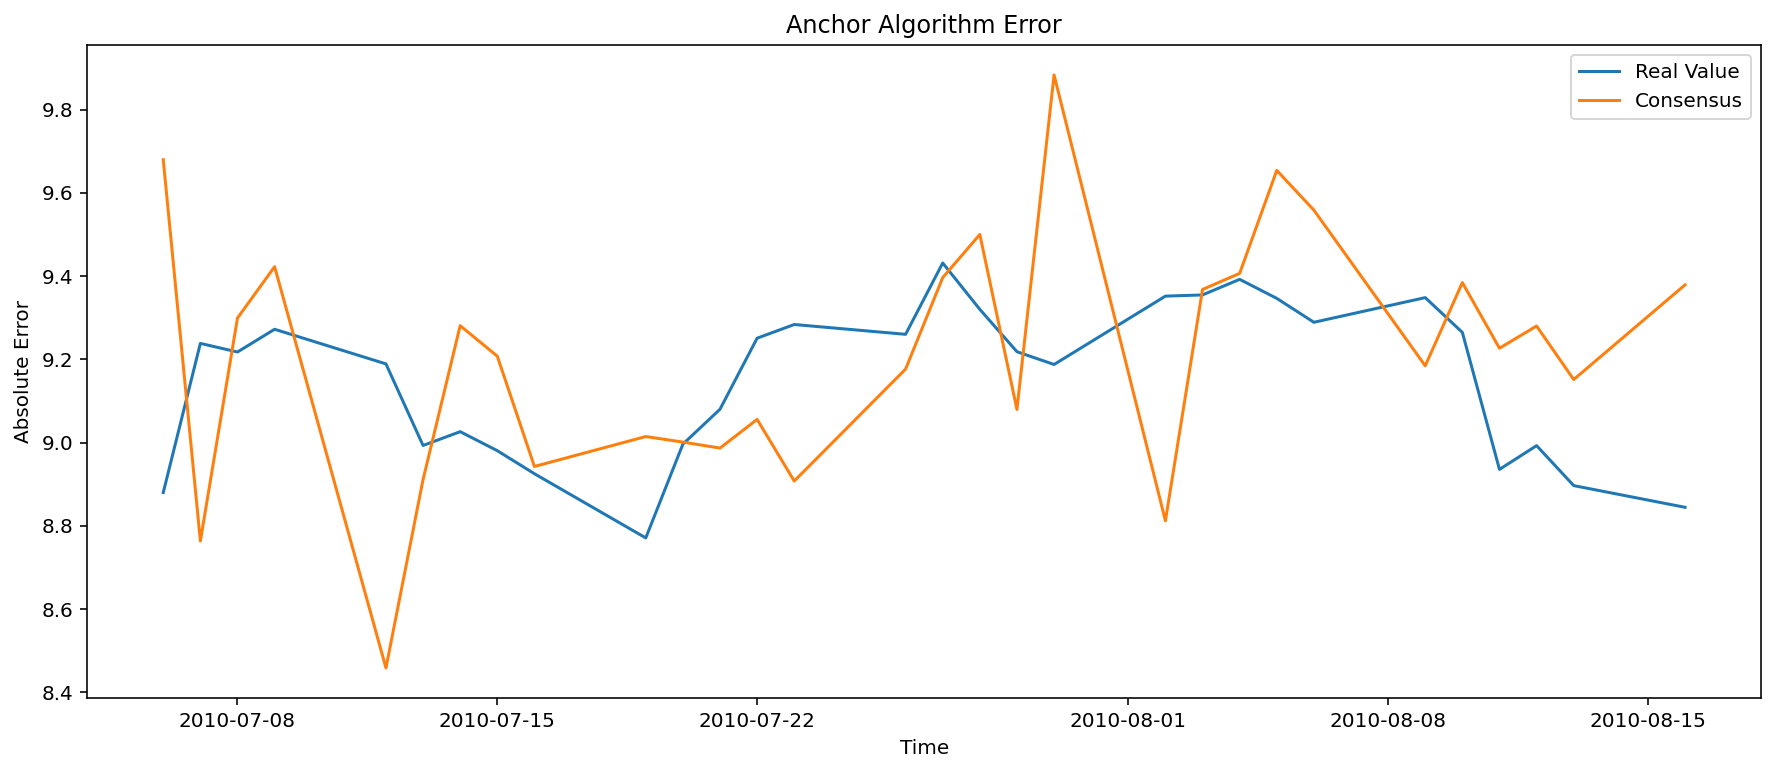

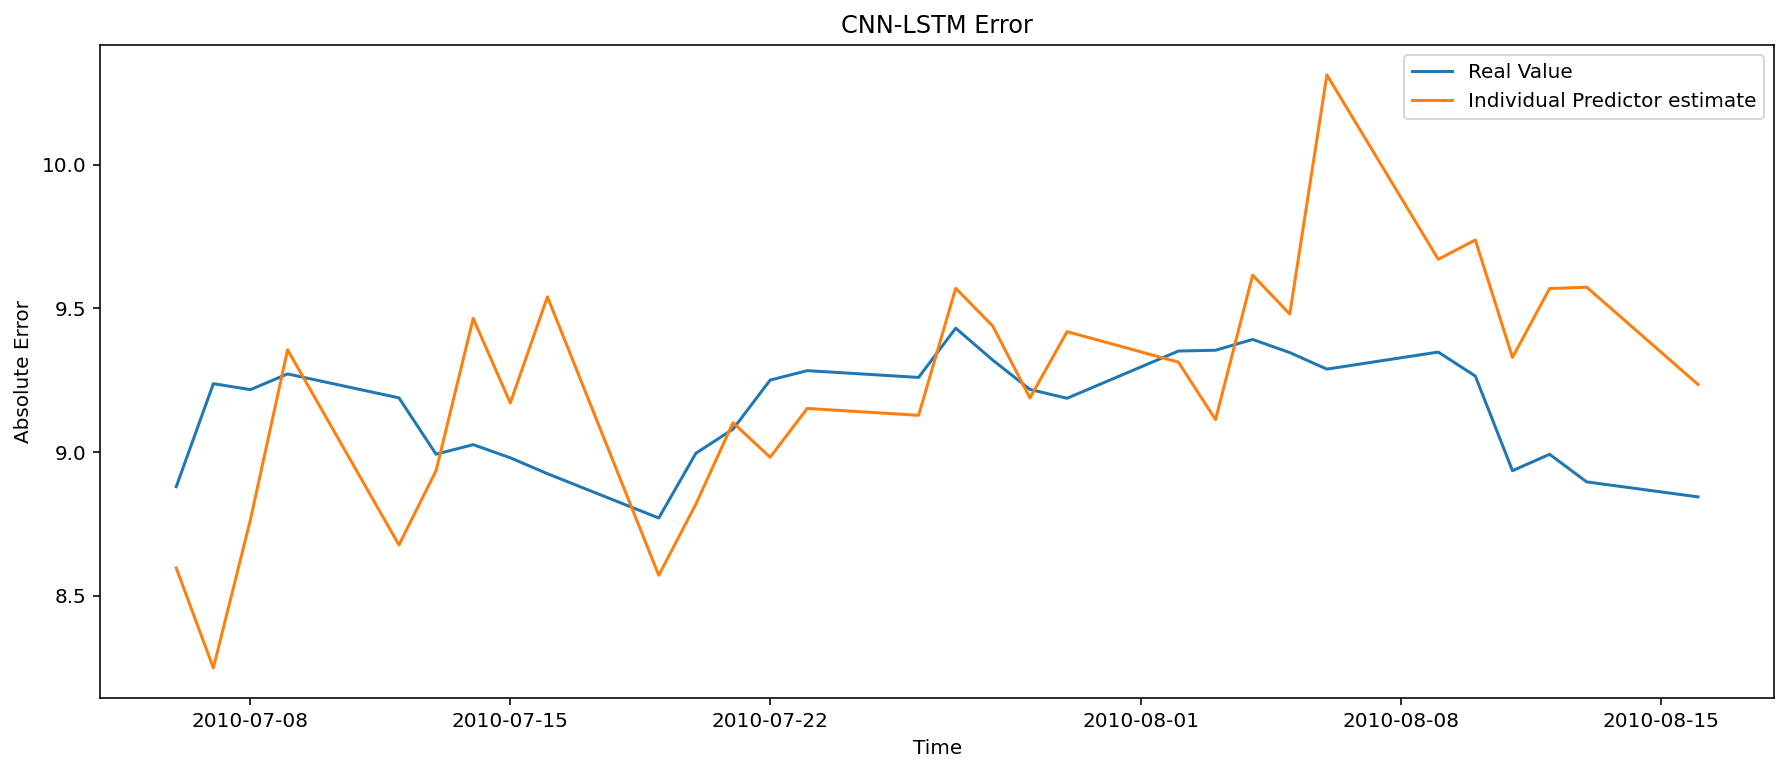

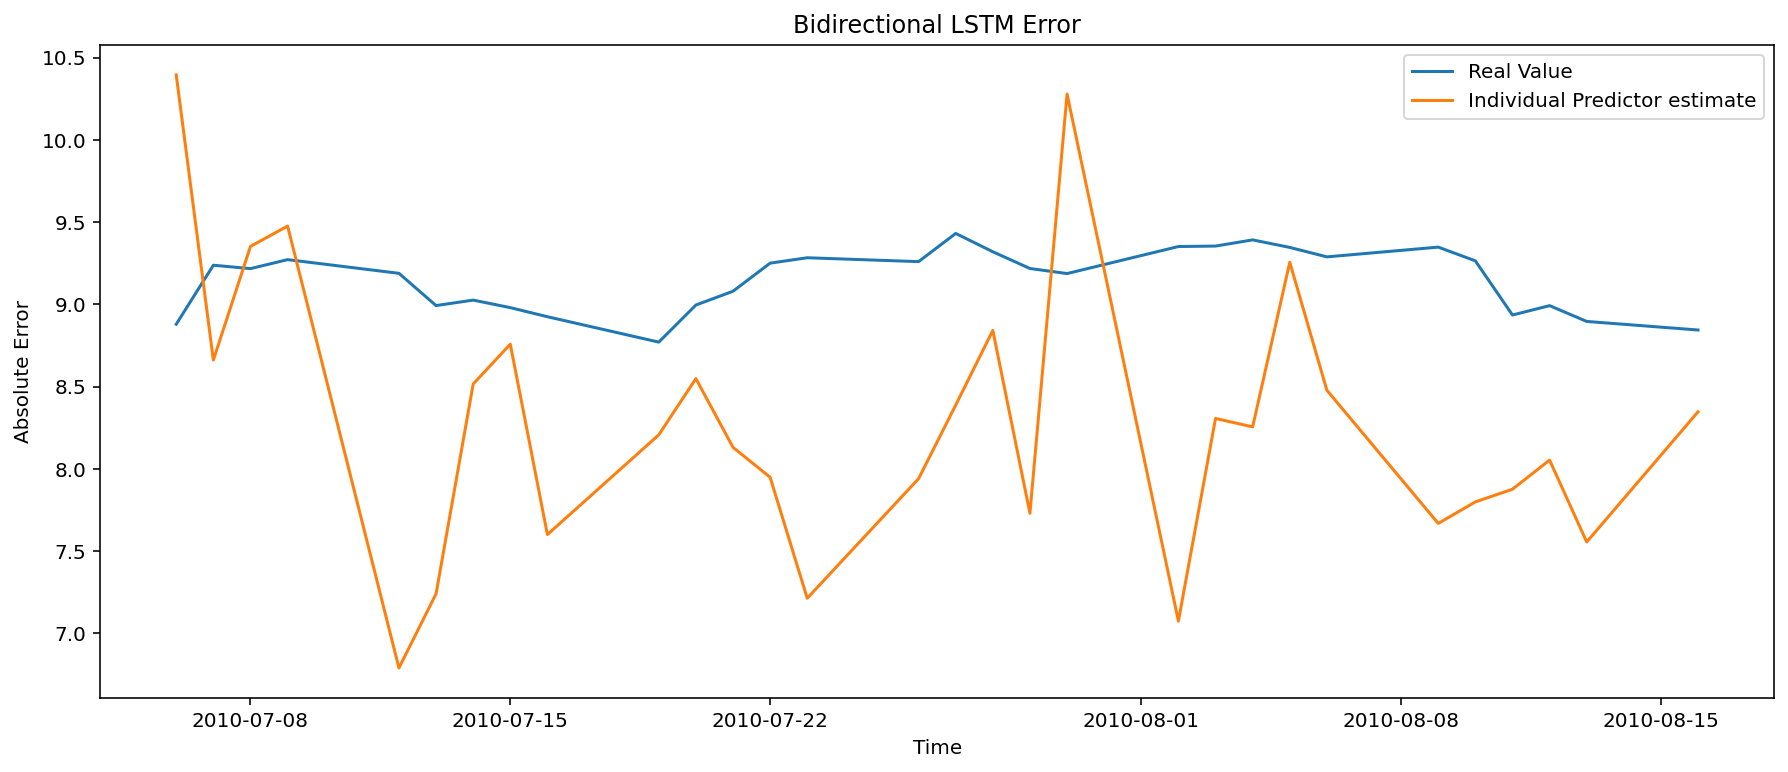

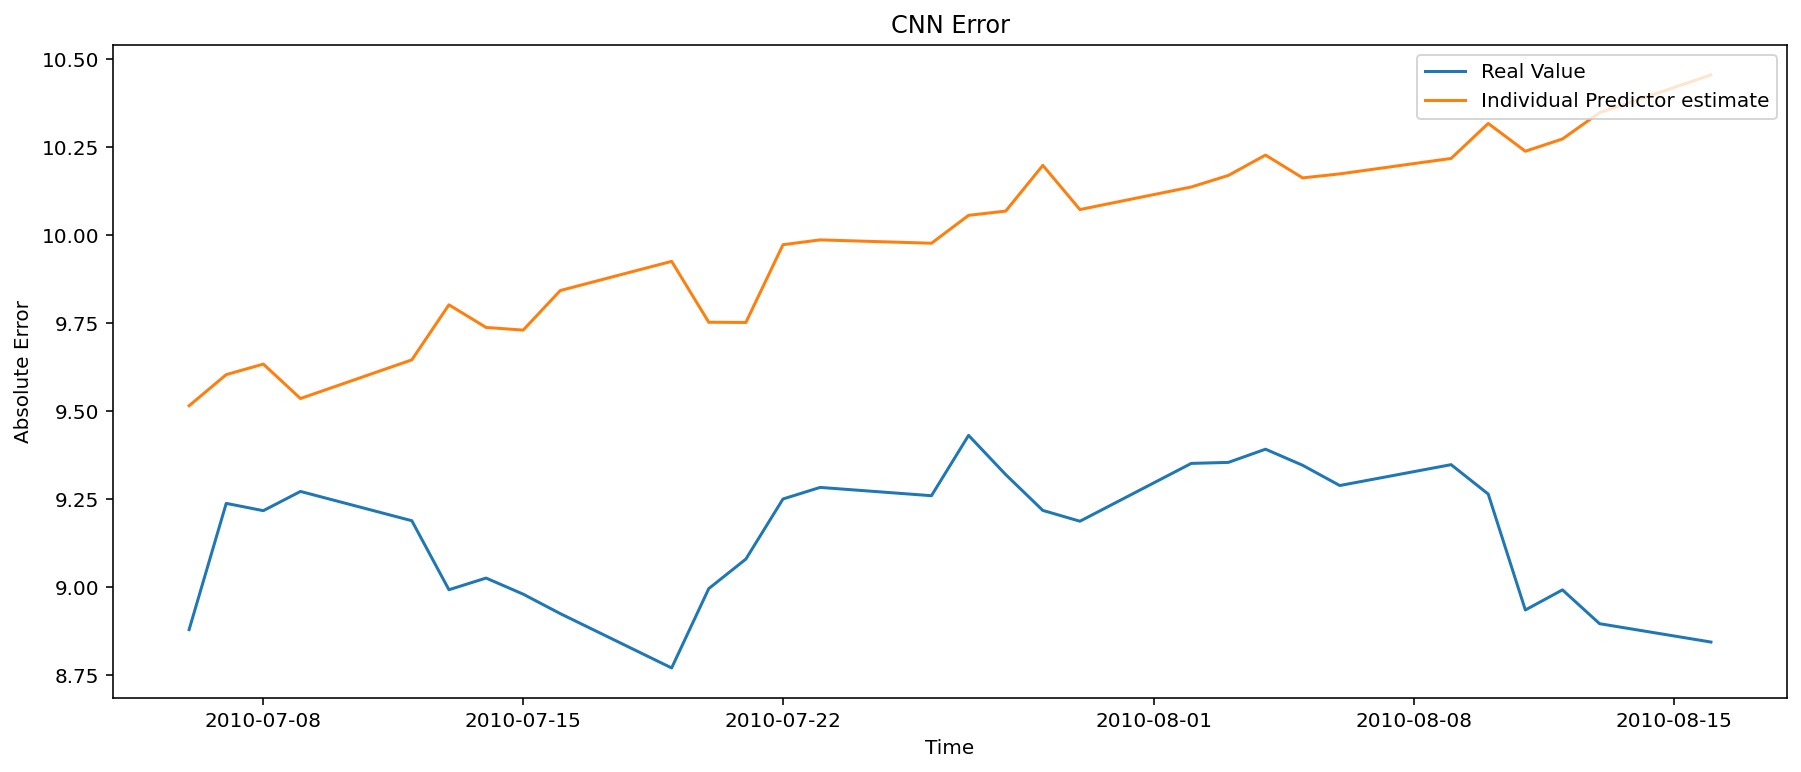

In [22]:
plot_performance(ui)

In [4]:
d = {'Date': ['2010-02-01','2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10'], 'High': [7, 7.011428833, 7.150000095, 7.084642887, 7, 7.067142963, 7.053571224, 7.021429062]}
data = pd.DataFrame(data=d)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
d = {'Date': ['2010-02-01','2010-02-02', '2010-02-03'], 'High': [7, 7.011428833, 7.150000095]}
data = pd.DataFrame(data=d)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [26]:
data

,High
Date,
2010-02-01,7.000000
2010-02-02,7.011429
2010-02-03,7.150000
2010-02-04,7.084643
2010-02-05,7.000000
2010-02-08,7.067143
2010-02-09,7.053571
2010-02-10,7.021429


In [29]:
to = data_prep(data, 3, 2)

In [33]:
to[0]

,High
Date,
2010-02-01,7.000000
2010-02-02,7.011429
2010-02-03,7.150000


In [34]:
to[1]

,High
Date,
2010-02-04,7.084643
2010-02-05,7.000000
